In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import os

In [2]:
conn = sqlite3.connect(os.path.join('data','data.db'))

# 讀資料進來 
因為資料有 1689044 rows × 15 columns 所以跑比較慢  要等一會兒

In [3]:
df = pd.read_sql('select * from price',conn)
df

,stock_id,date,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
0,0015,2012-01-02 00:00:00,1000,1,6720,6.72,6.72,6.72,6.72,0.03,6.66,2.0,6.70,6.0,0.00
1,0015,2012-01-03 00:00:00,3000,3,20210,6.75,6.75,6.71,6.71,0.01,6.71,1.0,6.75,16.0,0.00
2,0015,2012-01-04 00:00:00,11000,3,74250,6.75,6.75,6.75,6.75,0.04,6.75,9.0,6.79,2.0,0.00
3,0015,2012-01-05 00:00:00,7000,2,47110,6.73,6.73,6.73,6.73,0.02,6.74,12.0,6.79,3.0,0.00
4,0015,2012-01-06 00:00:00,39000,11,262450,6.73,6.73,6.71,6.73,0.00,6.73,20.0,6.81,3.0,0.00
5,0015,2012-01-09 00:00:00,6000,2,40380,6.73,6.73,6.73,6.73,0.00,6.73,20.0,6.78,1.0,0.00
6,0015,2012-01-12 00:00:00,34000,34,231880,6.82,6.82,6.82,6.82,0.00,6.82,10.0,6.86,10.0,0.00
7,0015,2012-01-13 00:00:00,11000,11,75150,6.85,6.85,6.83,6.83,0.01,6.77,5.0,6.85,1.0,0.00
8,0015,2012-01-16 00:00:00,40000,29,273400,6.84,6.84,6.83,6.83,0.00,6.75,2.0,6.83,3.0,0.00
9,0015,2012-01-17 00:00:00,11000,11,75190,6.83,6.89,6.83,6.89,0.06,6.84,17.0,6.88,11.0,0.00


# 找到201612月最後一筆的index
所以從下面程式碼可以看到 先將data欄位做排序 就會從2012/01/02排到2019/05/10

training data 是2012~2016年底 共5年

texting data 是2017~2019/5/10


然後找2016年12月最後一天，因為31日是假日沒有開盤，所以最後一筆就是2016/12/30以前的所有資料了 把它的位置記起來


training data(2012/01/02~2016/12/30): df第0個位置到第1100709

texting data(2017/01/02~2019/05/10): df第1100710個位置到第1689043


In [4]:
df_sort_by_date = df.sort_values(by='date', ascending=True)
df_sort_by_date = df_sort_by_date.reset_index(drop=True)#重置索引reset_index來獲取默認索引0,1,2，...，n-1（drop=True要刪除現有索引)
train_end_index = np.where(df_sort_by_date['date'] == '2016-12-30 00:00:00')[0][-1]
train_end_index

1100709

# 製作training data 與 testing data 
這是全部的訓練集，等等會讓使用者看要哪個stock，預測時會用使用者輸入的stock的train來做
 
training data(2012/01/02~2016/12/30): df第0個位置到第1100709

testing data(2017/01/02~2019/05/10): df第1100710個位置到第1689043

In [5]:
ALL_train = df_sort_by_date.iloc[:train_end_index+1,:] # 這是全部的訓練集，等等會讓使用者看要哪個stock，預測時會用使用者輸入的stock的train來做
ALL_test = df_sort_by_date.iloc[train_end_index+1:len(df),:]
print(ALL_train.shape)
print(ALL_test.shape)

(1100710, 15)
(588334, 15)


# 讓使用者輸入想看的stock id

使用者輸入想看的股票代碼 ex:3008

有下拉式選單讓使用者選其股票的'開盤價'最高價''最低價''收盤價' 的未來趨勢

In [6]:
def f(x):
    print('你選擇的是:')
    if (x==1):
        print('開盤價')
    elif (x==2):
        print('最高價')
    elif (x==3):
        print('最低價')
    elif (x==4):
        print('收盤價')
    return x
        

print('您好，我們將會為您預測股票未來趨勢')

stock_id_user_input = input('請輸入你想看的股票id：')#3008

print('歡迎使用，你想看的股票id是', stock_id_user_input)

y = interact(f, x={"開盤價":1,"最高價":2,"最低價":3,"收盤價":4})


您好，我們將會為您預測股票未來趨勢
請輸入你想看的股票id：3008
歡迎使用，你想看的股票id是 3008


interactive(children=(Dropdown(description='x', options={'最低價': 3, '收盤價': 4, '開盤價': 1, '最高價': 2}, value=3), Ou…

# 製作使用者想要看的stock的training data

In [7]:
# Import the training set
choose_user_input = int(y.widget.result)

stock_id_index = np.where(ALL_train['stock_id'] == stock_id_user_input)
dataset_train = ALL_train.iloc[stock_id_index[0],[0,4+choose_user_input]]
training_set = ALL_train.iloc[stock_id_index[0],[4+choose_user_input]] # 讀取訓練集
print('training set 大小:',training_set.shape)
dataset_train.head()

training set 大小: (1232, 1)


,stock_id,開盤價
165,3008,573.0
1003,3008,561.0
2449,3008,593.0
2812,3008,588.0
4165,3008,591.0


# 把它縮小到0與1之間

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# 訓練的資料格式：設定 Timestep
Timesteps 設為 60 ，代表過去 60 天的資訊，嘗試過數值設置太少，將使 RNN 無法學習

X_train 預測點的前 60 天的資料
y_train 預測點

In [9]:
X_train = []   #預測點的前 60 天的資料
y_train = []   #預測點
for i in range(60, training_set.shape[0]):  # training set 大小 
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN
print(X_train.shape)
print(y_train.shape)

(1172, 60)
(1172,)


# Reshape

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 製作模型

In [11]:
# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

Using TensorFlow backend.


# 搭建 LSTM layer

units: 神經元的數目

共四層 LSTM Layer 

In [12]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Ouput Layer: units 設為 1

In [13]:
regressor.add(Dense(units = 1))

# Compiling & Fitting LSTM model

In [14]:
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1172/1172 [==============================] - 4s 4ms/step - loss: 0.0509
Epoch 2/100
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0067
Epoch 3/100
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0055
Epoch 4/100
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0050
Epoch 5/100
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0044
Epoch 6/100
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0042
Epoch 7/100
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0047
Epoch 8/100
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0044
Epoch 9/100
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0040
Epoch 10/100
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0037
Epoch 11/100
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0036
Epoch 12/100
1172/1172 [==

1172/1172 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 95/100
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0016
Epoch 96/100
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0016
Epoch 97/100
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 98/100
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 99/100
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0015
Epoch 100/100
1172/1172 [==============================] - 3s 2ms/step - loss: 0.0015


# testing data(2017/01/02~2019/05/10)（真實）

In [15]:
# dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
# real_stock_price = dataset_test.iloc[:, 1:2].values
# ALL_test
stock_id_index = np.where(ALL_test['stock_id'] == stock_id_user_input)
dataset_test = ALL_test.iloc[stock_id_index[0],[0,4+choose_user_input]]
real_stock_price = ALL_test.iloc[stock_id_index[0],[4+choose_user_input]] # 讀取訓練集
real_stock_price = real_stock_price.reset_index(drop=True)
print('real_stock_price 大小:',real_stock_price.shape)
dataset_test.head()


real_stock_price 大小: (573, 1)


,stock_id,開盤價
1101488,3008,3805.0
1101841,3008,3815.0
1103604,3008,3840.0
1103935,3008,4050.0
1104674,3008,4175.0


# testing data(2017/01/02~2019/05/10)（預測）

In [16]:
dataset_total = pd.concat((dataset_train[dataset_train.columns[1]], dataset_test[dataset_test.columns[1]]), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)

inputs = sc.fit_transform(inputs) # Feature Scaling

X_test = []
for i in range(60, len(dataset_test)+60):  # timesteps一樣60； 80 = 先前的60天資料+2017年的20天資料
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape 成 3-dimension

print(X_test.shape)

(573, 60, 1)


In [17]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # to get the original scale

# 更改index 因為想讓呈現效果是 x軸是date 所以將index改成date

In [18]:
new_index = ALL_test.iloc[stock_id_index[0],[1]]

for i in range(0,len(ALL_test.iloc[stock_id_index[0],[1]])):
    new_index.iloc[i,0] = ALL_test.iloc[stock_id_index[0],[1]].values[i][0].replace('00:00:00', '')
    
real_stock_price = real_stock_price.set_index(new_index['date'].values)


# Visualising the results

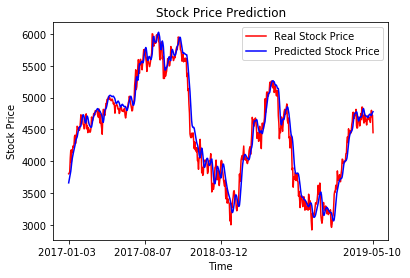

In [19]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')  # 紅線表示真實股價
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')  # 藍線表示預測股價
plt.xticks(new_index.iloc[[0, 143, 286, 572],0])
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()